In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['path.simplify']    = True
plt.rcParams['font.family']  = 'monospace'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 3    
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.handletextpad'] = 0.3
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['grid.color'] = 'k'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.5

In [3]:
"""
Variables to comparate:
    - Air temperature
    - Dew point temperature
    - Wind speed
    - Precipiiation
"""

'\nVariables to comparate:\n    - Air temperature\n    - Dew point temperature\n    - Wind speed\n    - Precipiiation\n'

In [4]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

In [5]:
start_date = '2006-01-01'
end_date = '2023-12-31'

In [6]:
#Definiendo nombres de la coulumna e  a Função para formatar data e hora
filename = '../data/meteoro_LNA/2006_2023.txt'

def format_date(row):
    day, month, year = row['date'].split('/')
    year = f"20{year}"  # Adicionando o prefixo "20" ao ano
    hour, minute = row['time'].split(':')
    hour = hour.zfill(2)
    minute = minute.zfill(2)
    return f"{year}/{month}/{day} {hour}:{minute}"

names=['date','time','temp_out','hi_temp','low_temp','out_hum','dew_pt','wind_speed',
       'wind_dir','win_run','hi_speed','wind_chill','heat_index','THW_index','bar','rain',
       'heat_DD','cool_DD','in_temp','in_hum','in_dew','in_heat','arc_int']


# Lendo o arquivo CSV e atribuindo os nomes  das colunas

data = pd.read_csv(filename, names=names,skiprows=2, delimiter='\t', header=None,)

data.head()

/tmp/ipykernel_458094/3252640576.py:19: DtypeWarning: Columns (2,3,4,5,6,11,12,13,14,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, names=names,skiprows=2, delimiter='\t', header=None,)


,date,time,temp_out,hi_temp,low_temp,out_hum,dew_pt,wind_speed,wind_dir,win_run,...,THW_index,bar,rain,heat_DD,cool_DD,in_temp,in_hum,in_dew,in_heat,arc_int
0,01/09/06,0:05,17.9,17.9,17.8,68,11.9,27.4,ESE,2.28,...,14.7,1010.6,0.0,0.002,0.000,20.6,43,7.5,19.4,5
1,01/09/06,0:10,17.8,17.8,17.8,68,11.8,25.7,ESE,2.15,...,14.8,1010.6,0.0,0.002,0.000,20.5,44,7.8,19.4,5
2,01/09/06,0:15,17.8,17.8,17.8,68,11.8,29.0,ESE,2.41,...,14.4,1010.0,0.0,0.002,0.000,20.4,44,7.8,19.3,5
3,01/09/06,0:20,17.8,17.9,17.8,68,11.8,30.6,ESE,2.55,...,14.3,1010.0,0.0,0.002,0.000,20.4,44,7.8,19.3,5
4,01/09/06,0:25,17.9,17.9,17.9,68,12.0,30.6,ESE,2.55,...,14.4,1010.0,0.0,0.001,0.000,20.4,44,7.8,19.3,5


In [7]:
# criar a coluna 'datetime'
data['datetime'] = data.apply(lambda row: format_date(row), axis=1)

# Convertendo a coluna 'datetime' para o tipo datetime
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.set_index("datetime", drop=True).sort_index()

# Removendo as colunas originais 'date' e 'time'
data.drop(["date", "time"], inplace=True, axis=1)

data.head()

,temp_out,hi_temp,low_temp,out_hum,dew_pt,wind_speed,wind_dir,win_run,hi_speed,wind_chill,...,THW_index,bar,rain,heat_DD,cool_DD,in_temp,in_hum,in_dew,in_heat,arc_int
datetime,,,,,,,,,,,,,,,,,,,,,
2006-09-01 00:05:00,17.9,17.9,17.8,68,11.9,27.4,ESE,2.28,32.2,14.8,...,14.7,1010.6,0.0,0.002,0.000,20.6,43,7.5,19.4,5
2006-09-01 00:10:00,17.8,17.8,17.8,68,11.8,25.7,ESE,2.15,32.2,14.9,...,14.8,1010.6,0.0,0.002,0.000,20.5,44,7.8,19.4,5
2006-09-01 00:15:00,17.8,17.8,17.8,68,11.8,29.0,ESE,2.41,32.2,14.6,...,14.4,1010.0,0.0,0.002,0.000,20.4,44,7.8,19.3,5
2006-09-01 00:20:00,17.8,17.9,17.8,68,11.8,30.6,ESE,2.55,33.8,14.5,...,14.3,1010.0,0.0,0.002,0.000,20.4,44,7.8,19.3,5
2006-09-01 00:25:00,17.9,17.9,17.9,68,12.0,30.6,ESE,2.55,35.4,14.6,...,14.4,1010.0,0.0,0.001,0.000,20.4,44,7.8,19.3,5


In [83]:
df_obs = data[['temp_out', 'out_hum', 'dew_pt', 'wind_speed', 'rain']]
df_obs.columns = ['temperature_obs', 'relative_humidity_obs', 'dew_point_obs', 'wind_speed_obs', 'rain_obs']
df_obs = df_obs.loc[start_date:end_date]
for variable in df_obs.columns:
    # data[variable] = data[variable].astype(object)
    df_obs[variable] = df_obs[variable].replace('---', None) 
    df_obs[variable] = df_obs[variable].replace('------', None)
    df_obs[variable] = df_obs[variable].replace('', None) 
    df_obs[variable] = df_obs[variable].astype(np.float32)

df_obs.dropna(inplace=True)
df_obs.head()

,temperature_obs,relative_humidity_obs,dew_point_obs,wind_speed_obs,rain_obs
datetime,,,,,
2006-09-01 00:05:00,17.900000,68.0,11.9,27.400000,0.0
2006-09-01 00:10:00,17.799999,68.0,11.8,25.700001,0.0
2006-09-01 00:15:00,17.799999,68.0,11.8,29.000000,0.0
2006-09-01 00:20:00,17.799999,68.0,11.8,30.600000,0.0
2006-09-01 00:25:00,17.900000,68.0,12.0,30.600000,0.0


In [84]:
df_obs['date_hour'] = df_obs.index
df_obs['date_hour'] = df_obs['date_hour'].dt.strftime('%Y-%m-%d %H')

# count how many times each date_hour appears in the dataset
gp_df_obs = df_obs.groupby('date_hour').size().reset_index(name='count')
gp_df_obs.head()

,date_hour,count
0,2006-09-01 00,11
1,2006-09-01 01,12
2,2006-09-01 02,12
3,2006-09-01 03,12
4,2006-09-01 04,12


In [85]:
complete_datehour = gp_df_obs[gp_df_obs['count'] >= 10]['date_hour']
df_obs = df_obs[df_obs['date_hour'].isin(complete_datehour)]
df_obs.drop('date_hour', axis=1, inplace=True)
df_obs.head()

,temperature_obs,relative_humidity_obs,dew_point_obs,wind_speed_obs,rain_obs
datetime,,,,,
2006-09-01 00:05:00,17.900000,68.0,11.9,27.400000,0.0
2006-09-01 00:10:00,17.799999,68.0,11.8,25.700001,0.0
2006-09-01 00:15:00,17.799999,68.0,11.8,29.000000,0.0
2006-09-01 00:20:00,17.799999,68.0,11.8,30.600000,0.0
2006-09-01 00:25:00,17.900000,68.0,12.0,30.600000,0.0


In [86]:
df_temp = df_obs.iloc[:, :-1].resample('1H').mean()
df_obs = df_obs.iloc[:, -1:].resample('1H').sum()
df_obs = pd.concat([df_temp, df_obs], axis=1)
df_obs = df_obs.loc[start_date:end_date]
df_obs = df_obs.dropna()
df_obs.head()

/tmp/ipykernel_458094/2093787509.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_temp = df_obs.iloc[:, :-1].resample('1H').mean()
/tmp/ipykernel_458094/2093787509.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_obs = df_obs.iloc[:, -1:].resample('1H').sum()


,temperature_obs,relative_humidity_obs,dew_point_obs,wind_speed_obs,rain_obs
datetime,,,,,
2006-09-01 00:00:00,17.845453,68.090912,11.881818,30.000000,0.0
2006-09-01 01:00:00,17.333334,71.583336,12.166667,28.550001,0.0
2006-09-01 02:00:00,17.316668,75.166664,12.883334,29.108332,0.0
2006-09-01 03:00:00,16.975000,76.750000,12.875000,26.158333,0.0
2006-09-01 04:00:00,16.908333,77.916664,13.050000,30.466667,0.0


In [87]:
temp = xr.open_mfdataset("../data/Reanalysis_ERA5/Single_Level/2m_temperature*.nc", combine='by_coords')
temp = temp.mean(dim=['latitude', 'longitude'])
temp = temp.sel(time=slice(start_date, end_date))
temp['t2m'] = temp.t2m - 273.15

# temp = xr.open_mfdataset("../data/Reanalysis_ERA5/Vertical_Profile/temperature_1000hPa_*.nc", combine='by_coords')
# temp = temp.mean(dim=['latitude', 'longitude'])
# temp = temp.sel(time=slice(start_date, end_date))
# temp['t'] = temp.t - 273.15

rh = xr.open_mfdataset("../data/Reanalysis_ERA5/Vertical_Profile/relative_humidity_1000hPa_*.nc", combine='by_coords')
rh = rh.mean(dim=['latitude', 'longitude'])
rh = rh.sel(time=slice(start_date, end_date))


dew = xr.open_mfdataset("../data/Reanalysis_ERA5/Single_Level/2m_dewpoint_temperature*.nc", combine='by_coords')
dew = dew.mean(dim=['latitude', 'longitude'])
dew = dew.sel(time=slice(start_date, end_date))
dew['d2m'] = dew.d2m - 273.15

u = xr.open_mfdataset("../data/Reanalysis_ERA5/Single_Level/10m_u_component_of_wind*.nc", combine='by_coords')
v = xr.open_mfdataset("../data/Reanalysis_ERA5/Single_Level/10m_v_component_of_wind*.nc", combine='by_coords')
# u = xr.open_mfdataset("../data/Reanalysis_ERA5/Vertical_Profile/u_component_of_wind_1000hPa_*.nc", combine='by_coords')
# v = xr.open_mfdataset("../data/Reanalysis_ERA5/Vertical_Profile/v_component_of_wind_1000hPa_*.nc", combine='by_coords')
wind = u.copy()
wind['ws'] = np.sqrt(u.u10**2 + v.v10**2)
wind = wind.drop(['u10'])
wind = wind.mean(dim=['latitude', 'longitude'])
wind = wind.sel(time=slice(start_date, end_date))

rain = xr.open_mfdataset("../data/Reanalysis_ERA5/Single_Level/total_precipitation*.nc", combine='by_coords')
rain = rain.mean(dim=['latitude', 'longitude'])
rain = rain.sel(time=slice(start_date, end_date))
rain['tp'] = rain.tp * 1000


df_era5 = xr.merge([temp, rh, dew, wind, rain]).to_dataframe()
df_era5.columns = ['temperature_era5', 'relative_humidity_era5', 'dew_point_era5', 'wind_speed_era5', 'rain_era5']
df_era5.head()


/tmp/ipykernel_458094/755679094.py:27: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  wind = wind.drop(['u10'])


,temperature_era5,relative_humidity_era5,dew_point_era5,wind_speed_era5,rain_era5
time,,,,,
2006-01-01 00:00:00,19.463139,75.857192,17.061181,0.817964,1.045288
2006-01-01 01:00:00,18.581408,79.721516,16.923478,1.108895,1.082956
2006-01-01 02:00:00,18.471278,85.403561,16.887134,0.938753,0.590581
2006-01-01 03:00:00,18.471968,89.682687,16.962245,1.337031,0.452657
2006-01-01 04:00:00,17.615299,90.924129,16.329453,1.538966,0.242344


In [92]:
full_df = pd.merge(df_obs, df_era5, left_index=True, right_index=True)
full_df = full_df.dropna()
full_df['wind_speed_obs'] = full_df['wind_speed_obs'] / 3.6

full_df = remove_outliers_iqr(full_df, 'temperature_obs')
full_df = remove_outliers_iqr(full_df, 'dew_point_obs')
full_df = remove_outliers_iqr(full_df, 'wind_speed_obs')


full_df.head()

,temperature_obs,relative_humidity_obs,dew_point_obs,wind_speed_obs,rain_obs,temperature_era5,relative_humidity_era5,dew_point_era5,wind_speed_era5,rain_era5
2006-09-01 00:00:00,17.845453,68.090912,11.881818,8.333334,0.0,17.528620,57.755536,11.891231,1.636011,0.0
2006-09-01 01:00:00,17.333334,71.583336,12.166667,7.930556,0.0,17.508617,59.873247,11.392710,1.791696,0.0
2006-09-01 02:00:00,17.316668,75.166664,12.883334,8.085648,0.0,17.647947,62.443537,11.324060,1.599721,0.0
2006-09-01 03:00:00,16.975000,76.750000,12.875000,7.266204,0.0,17.134543,64.316812,11.305888,1.254732,0.0
2006-09-01 04:00:00,16.908333,77.916664,13.050000,8.462963,0.0,16.666892,66.567853,10.899036,1.614347,0.0


In [103]:
variables = [
    'temperature',
    'dew_point',
    'wind_speed',
    # 'rain'
]

In [105]:
# calculate correlation between variables

correlations = {}

for variable in variables:
    correlations[variable] = full_df[f'{variable}_obs'].corr(full_df[f'{variable}_era5'])
correlations = pd.Series(correlations)
correlations.head()

temperature    0.655397
dew_point      0.821221
wind_speed     0.165603
dtype: float64

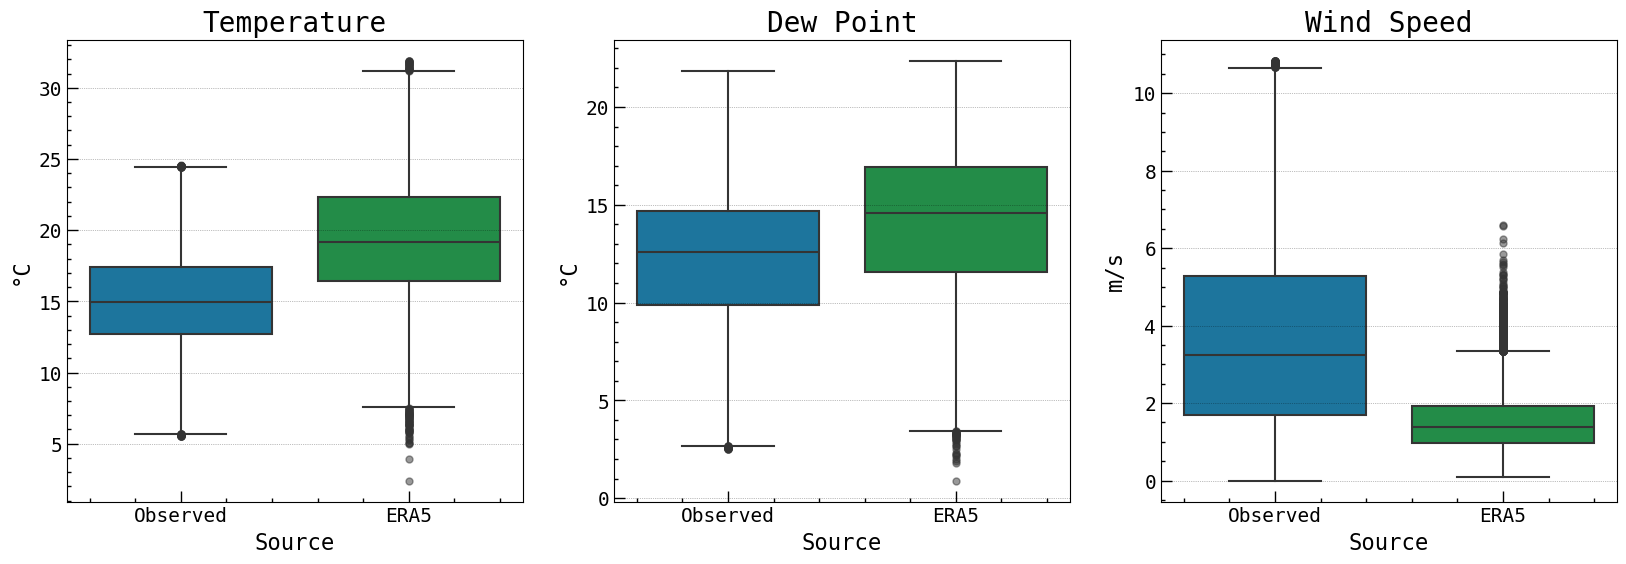

In [176]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# plot boxplot grouped
fliers = [
    True, 
    True,
    True,
    False
]
colors = [
    "#077DB3",
    "#129D43"
]
units = [
    "°C",
    "°C",
    "m/s",
]
titles = [
    "Temperature",
    "Dew Point",
    "Wind Speed",
]
for i, variable in enumerate(variables):
    sns.boxplot(
        data=full_df[[f'{variable}_obs', f'{variable}_era5']], 
        ax=ax[variables.index(variable)], 
        palette=colors,
        flierprops=dict(marker='o', markersize=5, color='red', linestyle='none', alpha=0.5, linewidth=1), 
        showfliers=fliers[i]
    )
    ax[variables.index(variable)].set_xticklabels(['Observed', 'ERA5'])
    ax[variables.index(variable)].set_title(f'{titles[i]}')
    ax[variables.index(variable)].set_ylabel(f'{units[i]}')
    ax[variables.index(variable)].set_xlabel('Source')


plt.savefig("../images/boxplot_era5_obs.png", dpi=300, bbox_inches="tight")
plt.savefig("../images/boxplot_era5_obs.pdf", dpi=300, bbox_inches="tight")

/root/anaconda3/envs/ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/envs/ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/root/anaconda3/envs/ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/root/anaconda3/envs/ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1075:

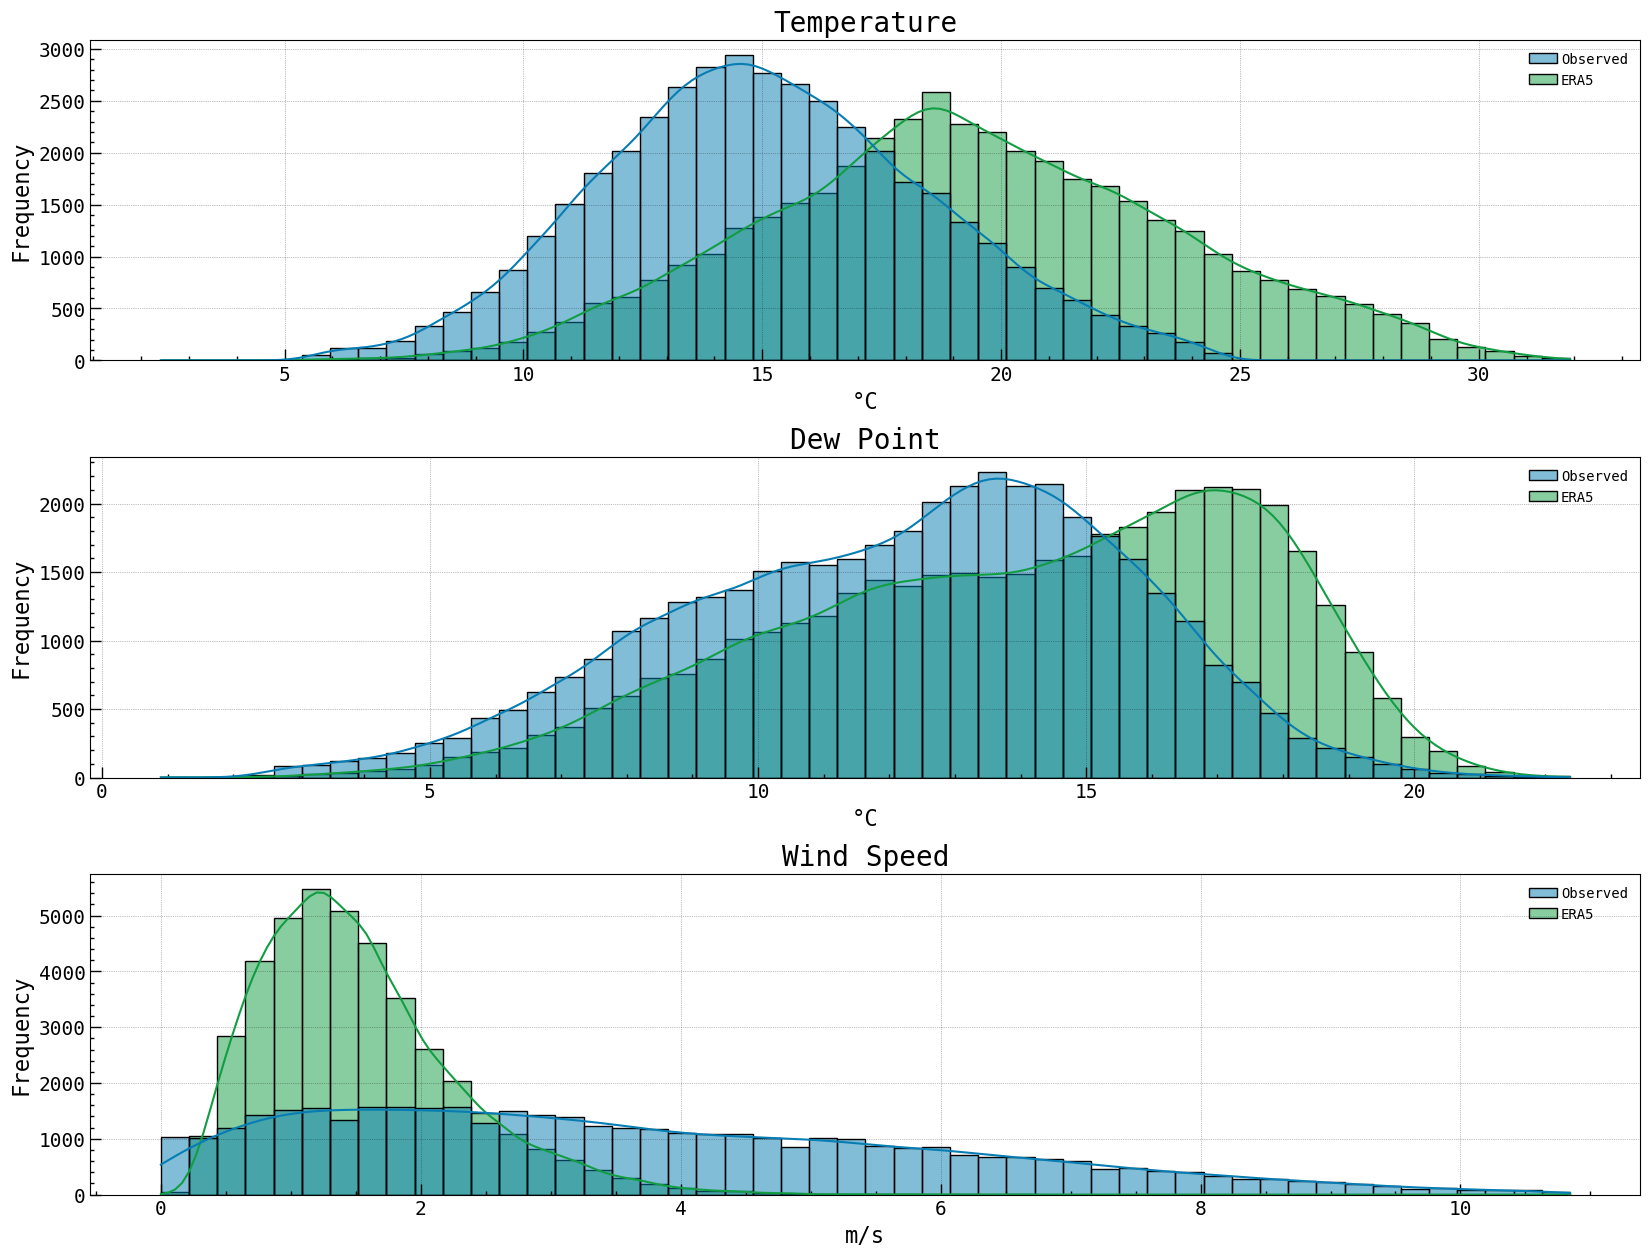

In [175]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15))

for i, variable in enumerate(variables):
    temp = full_df[[f'{variable}_obs', f'{variable}_era5']]
    temp.columns = ['Observed', 'ERA5']
    hist = sns.histplot(
        temp,
        bins=50, 
        kde=True, 
        ax=ax[i], 
        palette=colors
    )
    ax[i].set_title(f'{titles[i]}')
    ax[i].set_ylabel('Frequency')
    ax[i].set_xlabel(f'{units[i]}')

# custom space between subplots
plt.subplots_adjust(hspace=0.3)

plt.savefig("../images/histplot_era5_obs.png", dpi=300, bbox_inches="tight")
plt.savefig("../images/histplot_era5_obs.pdf", dpi=300, bbox_inches="tight")

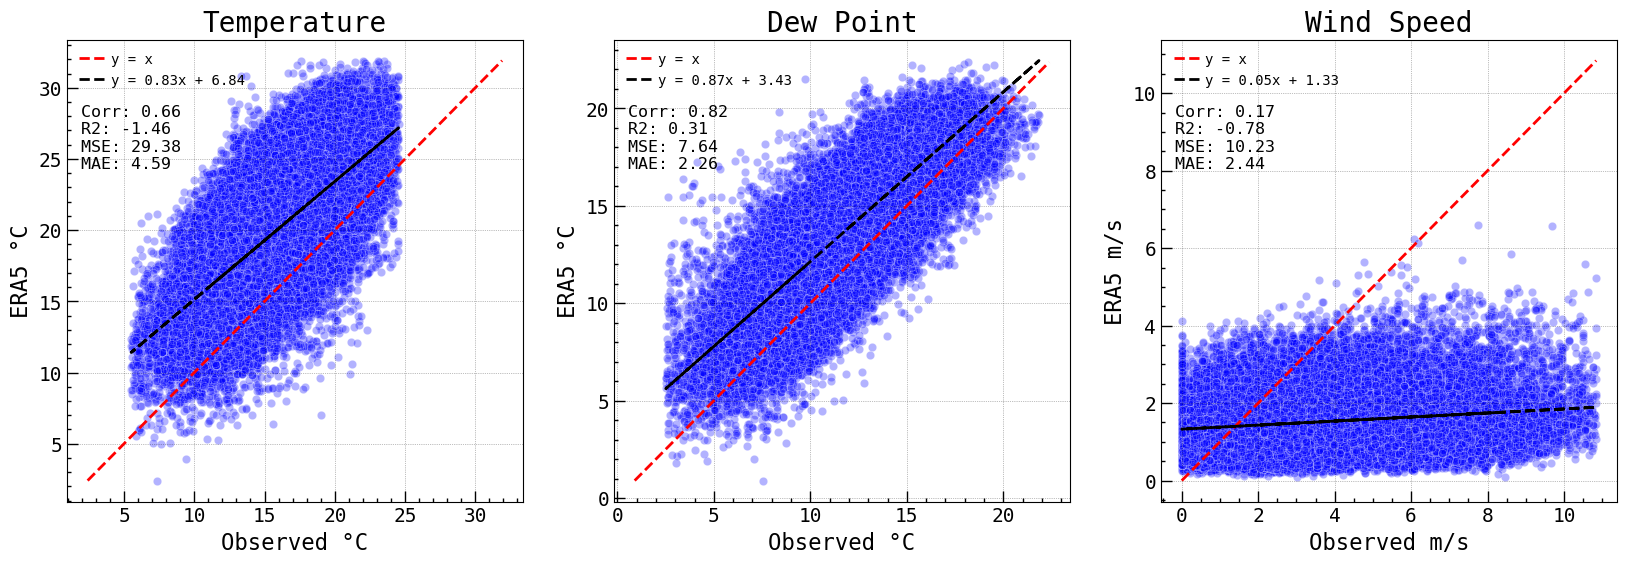

In [174]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

for i, variable in enumerate(variables):
    sns.scatterplot(
        x=f'{variable}_obs', 
        y=f'{variable}_era5', 
        data=full_df, 
        ax=ax[i], 
        color='blue',
        edgecolor='white',
        alpha=0.3
    )
    # plot identity line
    minx = min(full_df[f'{variable}_obs'].min(), full_df[f'{variable}_era5'].min())
    maxx = max(full_df[f'{variable}_obs'].max(), full_df[f'{variable}_era5'].max())
    miny = min(full_df[f'{variable}_obs'].min(), full_df[f'{variable}_era5'].min())
    maxy = max(full_df[f'{variable}_obs'].max(), full_df[f'{variable}_era5'].max())
    ax[i].plot(
        [minx, maxx], 
        [miny, maxy], 
        color='red',
        linewidth=2, 
        linestyle='--',
        label='y = x'
    )
    # regression line with numpy
    x = full_df[f'{variable}_obs']
    y = full_df[f'{variable}_era5']
    m, b = np.polyfit(x, y, 1)
    ax[i].plot(
        x, m*x + b, 
        color='black',
        linewidth=2,
        linestyle='--',
        label=f'y = {m:.2f}x + {b:.2f}'
    )
    corr = full_df[f'{variable}_obs'].corr(full_df[f'{variable}_era5'])
    r2 = r2_score(full_df[f'{variable}_obs'], full_df[f'{variable}_era5'])
    mse = mean_squared_error(full_df[f'{variable}_obs'], full_df[f'{variable}_era5'])
    mae = mean_absolute_error(full_df[f'{variable}_obs'], full_df[f'{variable}_era5'])
    ax[i].text(
        0.03, 0.86, 
        f'Corr: {corr:.2f}\nR2: {r2:.2f}\nMSE: {mse:.2f}\nMAE: {mae:.2f}', 
        verticalalignment='top', 
        horizontalalignment='left',
        transform=ax[i].transAxes,
        fontsize=12
    )
    
    ax[i].set_title(f'{titles[i]}')
    ax[i].set_ylabel(f'ERA5 {units[i]}')
    ax[i].set_xlabel(f'Observed {units[i]}')
    ax[i].legend(loc='upper left')

plt.savefig("../images/scatterplot_era5_obs.png", dpi=300, bbox_inches="tight")
plt.savefig("../images/scatterplot_era5_obs.pdf", dpi=300, bbox_inches="tight")